In [1]:
import datadotworld as dw
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
data_source = 'dakimova/medicare-partd-tidy-2016'
spend_2017 = dw.query(
    data_source,
    'SELECT * FROM medicare_partD_tidy_2017'
).dataframe.replace(r'^\s+$', np.nan, regex = True)

In [8]:
notnull_17_change = spend_2017[pd.notnull(spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'])]

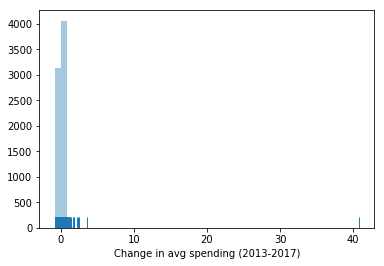

In [20]:
sns.distplot(tuple(notnull_17_change.iloc[:,4]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

In [22]:
spend_2017[spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] > 10]

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


In [23]:
spend_2017[spend_2017['brand_name'] == 'virt-nate']

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30766,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2015,NaN,NaN,0.008182,0.000273,NaN,NaN,11.0,330.0,0.09
30767,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2016,NaN,NaN,8.460870,0.246329,NaN,NaN,69.0,2370.0,583.80
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


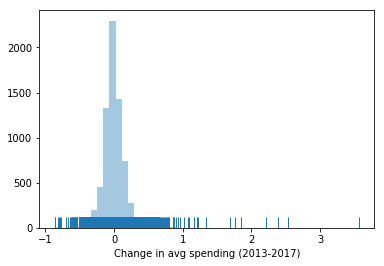

In [26]:
sns.distplot(tuple(notnull_17_change.iloc[:,4][notnull_17_change.iloc[:,4] < 10]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

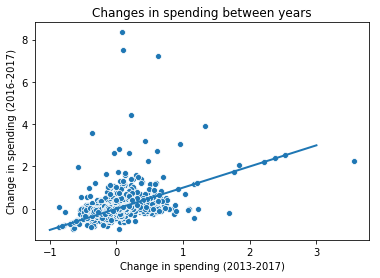

In [38]:
sns.scatterplot(
    data = notnull_17_change[notnull_17_change['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] < 10],
    x = 'annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017',
    y = 'change_in_average_spending_per_dosage_unit_2016_2017'
)
plt.xlabel("Change in spending (2013-2017)")
plt.ylabel("Change in spending (2016-2017)")
plt.title("Changes in spending between years")
plt.plot([-1, 3], [-1, 3], linewidth = 2)
plt.show()

In [48]:
top_100_13_to_17_change = notnull_17_change.sort_values('annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017', ascending = False).reset_index(drop=True).iloc[0:100,:]

In [39]:
# import drug use
drug_uses_17 = dw.query('dakimova/medicare-top-drugs-analysis', 'SELECT * FROM drug_use_information_4').dataframe

In [46]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.lower().str.strip()
drug_uses_17['generic_name'] = drug_uses_17['generic_name'].str.lower().str.strip()
drug_uses_17['drug_uses'] = drug_uses_17['drug_uses'].str.lower().str.strip()

In [47]:
drug_uses_17.sample(20)

,brand_name,generic_name,drug_uses
869,entresto,sacubitril/valsartan,this product is used to treat certain types of...
1929,paroex,chlorhexidine gluconate,this medication is used along with regular too...
800,dyrenium,triamterene,"triamterene is a ""water pill"" (diuretic) that ..."
1817,ocaliva,obeticholic acid,this medication is used alone or in combinatio...
1224,incruse ellipta,umeclidinium bromide,umeclidinium is used to control and prevent sy...
2733,virt-pn dha,prenatal 47/iron/folate 1/dha,this medication is a multivitamin and iron pro...
1788,novolin 70-30,insulin nph hum/reg insulin hm,combination isophane/regular insulin is used w...
1813,ob complete,prenatal no.123/iron/folic ac,this medication is a multivitamin and iron pro...
773,dorzolamide-timolol,dorzolamide hcl/timolol maleat,this product contains two drugs used to treat ...
2334,soriatane,acitretin,this medication is a retinoid used in the trea...


In [55]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.replace('*', '')

In [63]:
top_13_to_17_uses = pd.merge(top_100_13_to_17_change, drug_uses_17, on = ['brand_name', 'generic_name'], how = 'left', suffixes = ('_s', '_i'))
top_13_to_17_uses[['brand_name', 'generic_name', 'drug_uses']].head(20)

,brand_name,generic_name,drug_uses
0,virt-nate,"prenatal vit,cal 73/iron/folic",this medication is a multivitamin and iron pro...
1,sodium acetate,sodium acetate,drug uses not available
2,azithromycin,azithromycin,azithromycin is used to treat a wide variety o...
3,orbactiv,oritavancin diphosphate,this medication is an antibiotic used to treat...
4,fluphenazine hcl,fluphenazine hcl,this medication is used to treat symptoms of a...
5,potassium chloride,potassium chloride,this medication is a mineral supplement used t...
6,pro comfort alcohol pads,alcohol antiseptic pads,drug uses not available
7,acyclovir,acyclovir,acyclovir is used to treat infections caused b...
8,piperacillin-tazobactam,piperacillin sodium/tazobactam,piperacillin/tazobactam is used to treat a wid...
9,thiola,tiopronin,this medication is used to prevent kidney ston...


In [66]:
# did all drugs have a match in the drug uses dataset?
sum(pd.isnull(top_13_to_17_uses['drug_uses']))
# yes

0